# Handwritten Digit Recognition Using MLP and CNN on the MNIST Dataset

In [34]:
#pip install tensorflow numpy matplotlib

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Training data image shape: (60000, 28, 28)
Training data label shape: (60000,)
Test data image shape: (10000, 28, 28)
Test data label shape: (10000,)


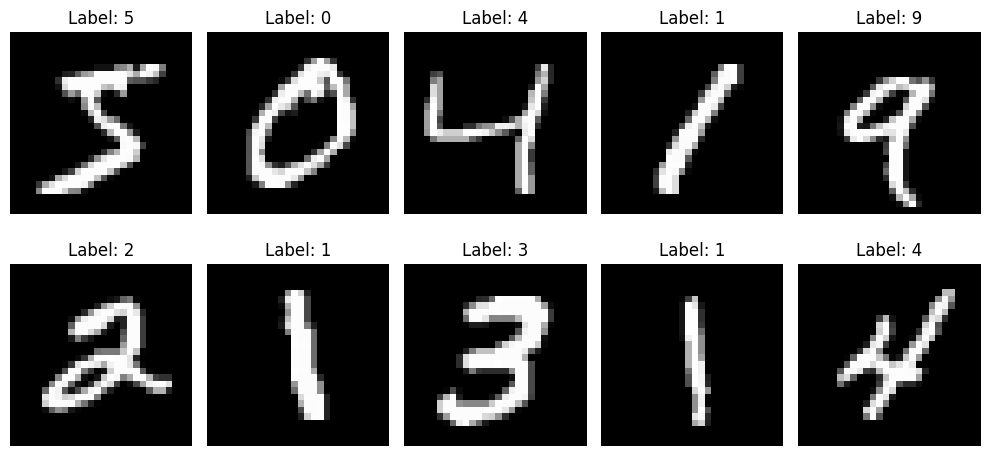

In [36]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

print("Training data image shape:", x_train_raw.shape)
print("Training data label shape:", y_train_raw.shape)
print("Test data image shape:", x_test_raw.shape)
print("Test data label shape:", y_test_raw.shape)

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_raw[i], cmap='gray')
    plt.title(f"Label: {y_train_raw[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
# Normalization
x_train_normalized = x_train_raw.astype('float32') / 255.0
x_test_normalized = x_test_raw.astype('float32') / 255.0

# One-hot encode labels
# We have 10 classes (digits 0-9)
num_classes = 10
y_train_categorical = to_categorical(y_train_raw, num_classes)
y_test_categorical = to_categorical(y_test_raw, num_classes)

print("\nAfter normalization and one-hot encoding:")
print("First training label (raw):", y_train_raw[0])
print("First training label (one-hot encoded):", y_train_categorical[0])


After normalization and one-hot encoding:
First training label (raw): 5
First training label (one-hot encoded): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Create MLP Model with Dropout
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax')
])

print("\nMLP Model (with Dropout) Summary:")
mlp_model.summary()


MLP Model (with Dropout) Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
mlp_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
print("\nMLP Model compiled.")


MLP Model compiled.


In [ ]:
# Define the Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)


Training MLP Model...
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7455 - loss: 0.8020 - val_accuracy: 0.9587 - val_loss: 0.1484
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9141 - loss: 0.2924 - val_accuracy: 0.9665 - val_loss: 0.1141
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9272 - loss: 0.2426 - val_accuracy: 0.9723 - val_loss: 0.0930
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9364 - loss: 0.2110 - val_accuracy: 0.9720 - val_loss: 0.0972
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9426 - loss: 0.1895 - val_accuracy: 0.9757 - val_loss: 0.0835
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1760 - val_accuracy: 0.9765 - val_loss: 0.0827
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.1691 - val_accuracy: 0.9757 - val_loss: 0.0851
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0

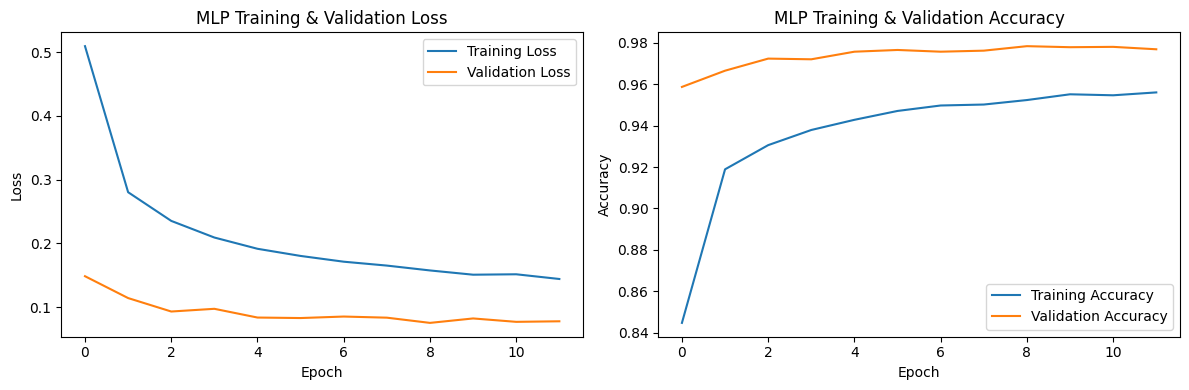

In [ ]:
# Train MLP Model
print("\nTraining MLP Model...")
mlp_history = mlp_model.fit(x_train_normalized, y_train_categorical,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.1,
                            callbacks=[early_stopping])


print("MLP Model training complete.")

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


MLP Test Loss: 0.0902
MLP Test Accuracy: 0.9753
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


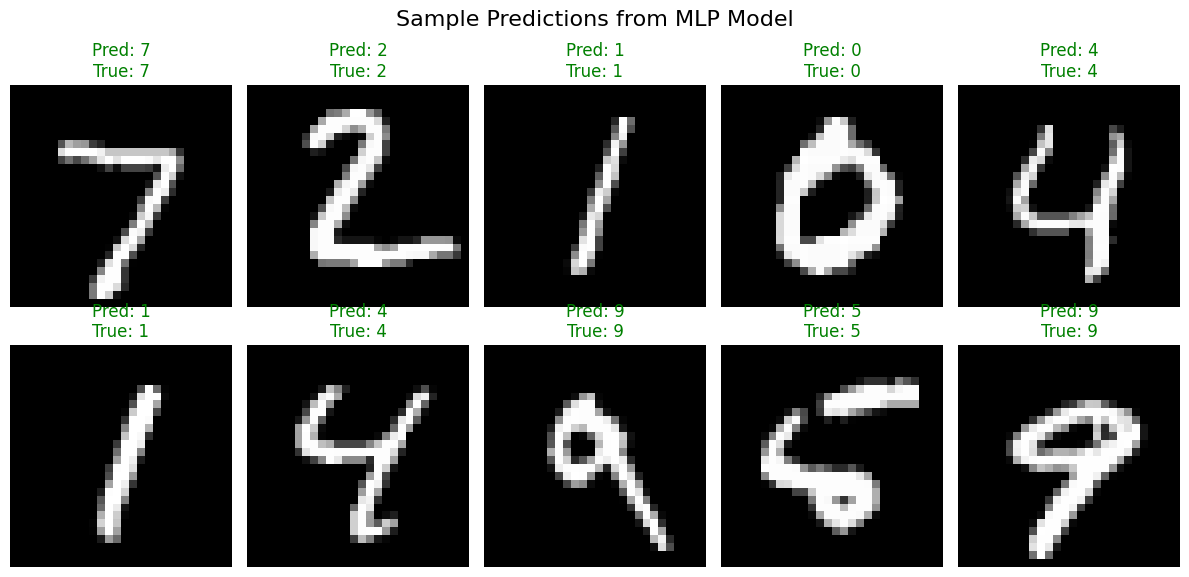

In [42]:
# Evaluate MLP Model on Test Data
mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test_normalized, y_test_categorical, verbose=0)
print(f"\nMLP Test Loss: {mlp_loss:.4f}")
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")

# Make predictions on a few test samples
predictions_mlp = mlp_model.predict(x_test_normalized)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_raw[i], cmap='gray')
    # predictions_mlp[i] is a probability distribution, find the index with the highest probability
    predicted_label_mlp = np.argmax(predictions_mlp[i])
    true_label = y_test_raw[i]
    plt.title(f"Pred: {predicted_label_mlp}\nTrue: {true_label}", 
              color=("green" if predicted_label_mlp == true_label else "red"))
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Predictions from MLP Model", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

In [43]:
# Reshape training and test images for CNN
# (Number_of_samples, Height, Width, Channels)
x_train_cnn = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(-1, 28, 28, 1)

print("\nReshaped data for CNN:")
print("Training data image shape (CNN):", x_train_cnn.shape)
print("Test data image shape (CNN):", x_test_cnn.shape)

# Labels (y_train_categorical, y_test_categorical) are the same as for MLP, no need to prepare again.


Reshaped data for CNN:
Training data image shape (CNN): (60000, 28, 28, 1)
Test data image shape (CNN): (10000, 28, 28, 1)


In [ ]:
# Create CNN Model with Dropout
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    # Optional: Dropout with a low rate (e.g., Dropout(0.25)) can also be added between Conv layers
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Optional: Dropout(0.25)
    
    Flatten(), 
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(num_classes, activation='softmax')
])

print("\nCNN Model (with Dropout) Summary:")
cnn_model.summary()


CNN Model (with Dropout) Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile CNN Model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nCNN Model compiled.")


CNN Model compiled.



Training CNN Model...
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8630 - loss: 0.4292 - val_accuracy: 0.9860 - val_loss: 0.0502
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0878 - val_accuracy: 0.9892 - val_loss: 0.0349
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9831 - loss: 0.0589 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9829 - loss: 0.0516 - val_accuracy: 0.9922 - val_loss: 0.0324
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0405 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9913 - val_loss: 0.0370
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0284 - val_accuracy: 0.9925 - val_loss: 0.0325
Epoch 7: early stopping
Restoring model weights from the end of th

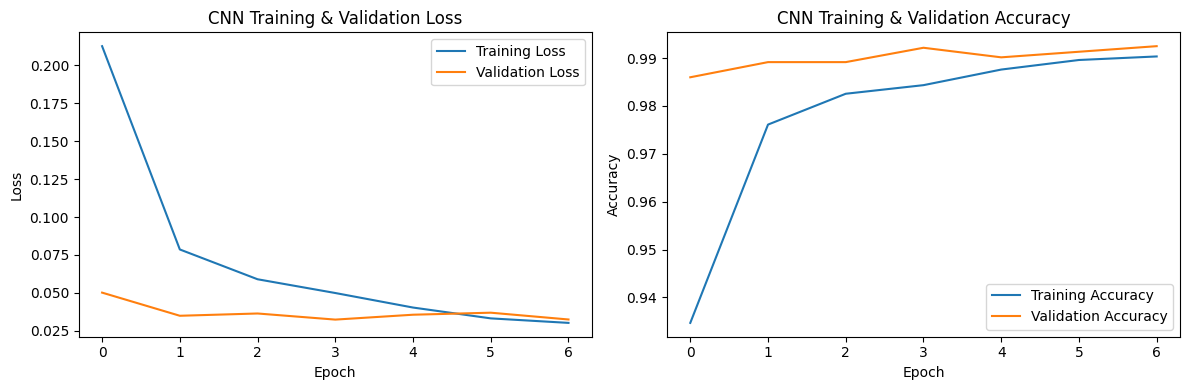

In [ ]:
# Train CNN Model
print("\nTraining CNN Model...")
cnn_history = cnn_model.fit(x_train_cnn, y_train_categorical,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.1,
                            callbacks=[early_stopping])

print("CNN Model training complete.")

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


CNN Test Loss: 0.0301
CNN Test Accuracy: 0.9899
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


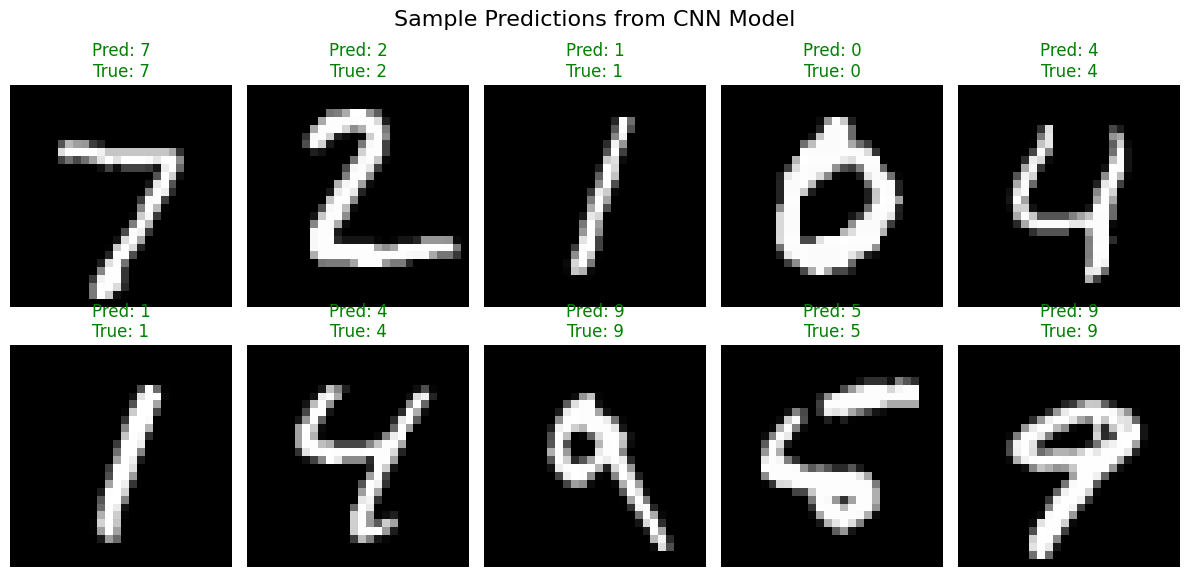

In [47]:
# Evaluate CNN Model on Test Data
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test_categorical, verbose=0)
print(f"\nCNN Test Loss: {cnn_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

# Make predictions on a few test samples
predictions_cnn = cnn_model.predict(x_test_cnn)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_raw[i], cmap='gray')
    # predictions_cnn[i] is a probability distribution, find the index with the highest probability
    predicted_label_cnn = np.argmax(predictions_cnn[i])
    true_label = y_test_raw[i]
    plt.title(f"Pred: {predicted_label_cnn}\nTrue: {true_label}", 
              color=("green" if predicted_label_cnn == true_label else "red"))
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Predictions from CNN Model", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

In [48]:
print("\n--- Comparison ---")
print(f"MLP Test Accuracy: {mlp_accuracy:.4f} ({mlp_accuracy*100:.2f}%)")
print(f"CNN Test Accuracy: {cnn_accuracy:.4f} ({cnn_accuracy*100:.2f}%)")

if cnn_accuracy > mlp_accuracy:
    print("\nAs expected, the CNN model performed better than the MLP model.")
elif cnn_accuracy < mlp_accuracy:
    print("\nInterestingly, the MLP model performed better than the CNN model. This could be due to hyperparameter settings or training duration.")
else:
    print("\nThe MLP and CNN models performed similarly.")


--- Comparison ---
MLP Test Accuracy: 0.9753 (97.53%)
CNN Test Accuracy: 0.9899 (98.99%)

As expected, the CNN model performed better than the MLP model.
